# Predict Clicked Ads Customer Classification by using Machine Learning

In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

## Load Dataset & Information

In [3]:
df = pd.read_csv("C:/Users/LENOVO/Downloads/CLicked Ads Dataset.csv")
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


## Statistical Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


- Terdapat data null pada kolom `Daily Time Spent on Site`,`Area Income`,`Daily Internet Usage`, dan `Male`. Sepertinya akan diisi dengan `modus` pada kolom `Male` dan sisanya diisi dengan median 
- kolom `Timestamp` seharusnya bertipe data datetime

In [5]:
cats = ['Male','Clicked on Ad','city','province','category']
nums = ['Unnamed: 0','Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Timestamp']

In [5]:
df[nums].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [6]:
df[cats].describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [7]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Male:
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count kolom Clicked on Ad:
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count kolom city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

Value count kolom province:
Daerah Khusus Ibukota Jakart

## Exploratory Data Analysis

### Univariate, Bivariate & Multivariate Analysis

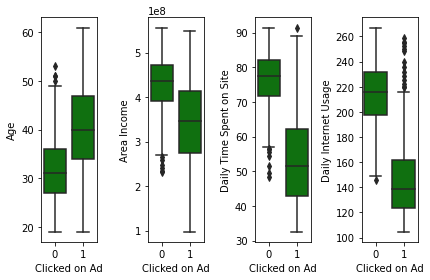

In [114]:
features = ['Age','Area Income','Daily Time Spent on Site','Daily Internet Usage']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(x=df['Clicked on Ad'],y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

Terlihat terdapat outlier pada kolom yang dipilih menjadi features

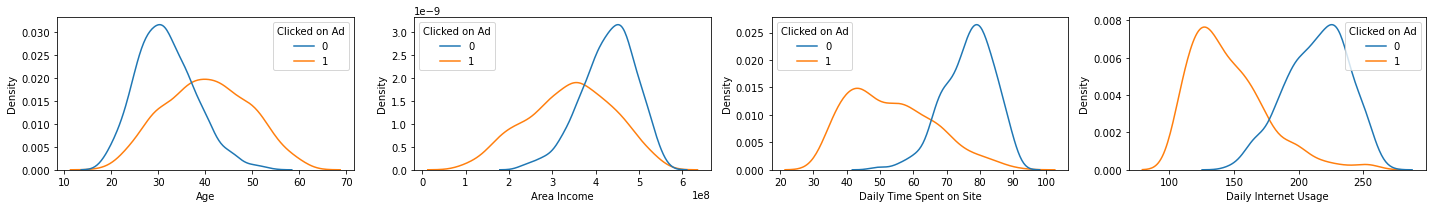

In [118]:
plt.figure(figsize=(20, 3))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.kdeplot(x=df[features[i]], hue=df['Clicked on Ad'])
    plt.xlabel(features[i])
    plt.tight_layout()

- Pada kolom `Age` data terlihat memiliki distribusi yang sedikit right skewed
- Pada kolom `Area Income` data terlihat memiliki distribusi yang sedikit left skewed
- Pada kolom `Daily Time Spent on Site` dan `Daily Internet Usage` data terlihat memiliki distribusi bimodal

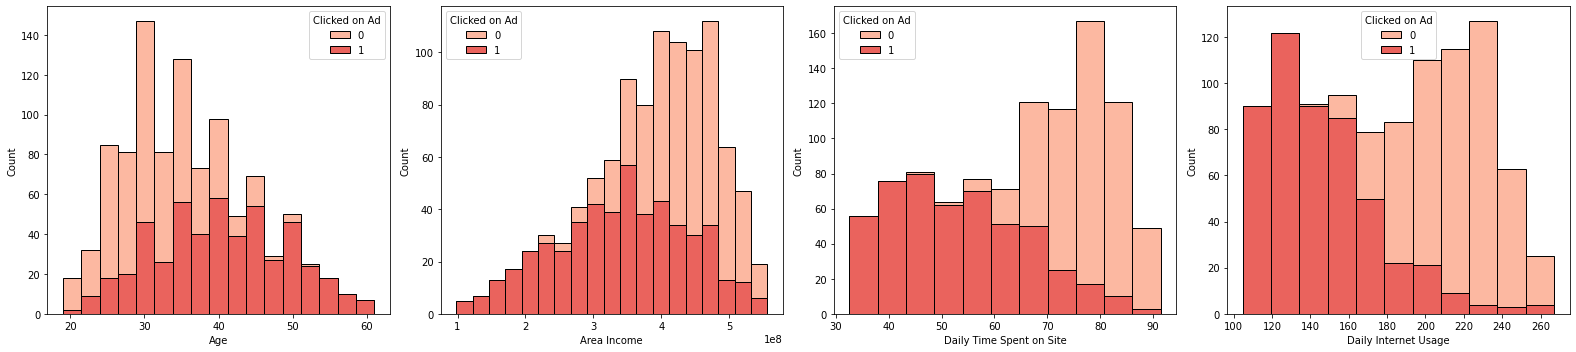

In [120]:
plt.figure(figsize=(22, 5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.histplot(x=df[features[i]], hue=df['Clicked on Ad'],multiple='stack',palette='Reds')
    plt.xlabel(features[i])
    plt.tight_layout()

Berdasarkan fitur `Age`, terbagi kedalam 3 segmen, yaitu:
- Click on ad dibawah 50% = umur 35 kebawah
- Click on ad 50% - 80% = Umur 35 - 45 Tahun
- Click on ad 80% keatas = Umur 45 Keatas

Berdasarkan fitur `Daily Time Spent on Site`, terbagi kedalam 3 segmen, yaitu:
- Click on ad dibawah 20% = Time Spent diatas 70 menit
- Click on ad 20% - 90% = Time Spent 55 - 70 menit
- CLick on ad diatas 90% = Time Spent 55 menit kebawah

Berdasarkan fitur `Daily Internet Usage`, terbagi kedalam 3 segmen, yaitu:
- Click on ad dibawah 25% = Internet Usage diatas 180 hari
- Click on ad 25% - 90% = Internet Usage 150 - 180 hari
- CLick on ad diatas 90% = Internet Usage dibawah 160 hari

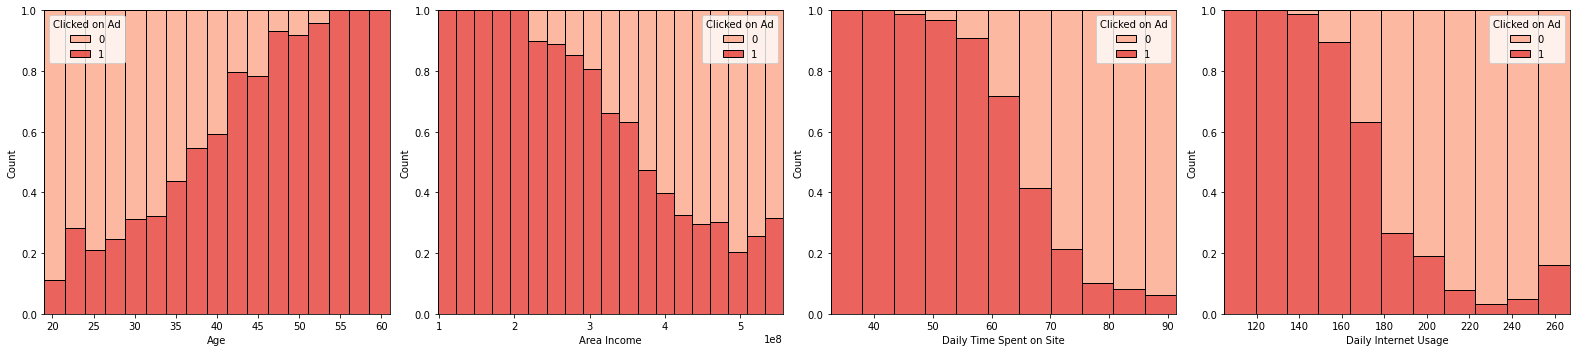

In [121]:
plt.figure(figsize=(22, 5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.histplot(x=df[features[i]], hue=df['Clicked on Ad'],multiple='fill',palette='Reds')
    plt.xlabel(features[i])
    plt.tight_layout()

In [11]:
df.corr()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Unnamed: 0,1.000000,-0.032637,0.001835,-0.056862,-0.004842
Daily Time Spent on Site,-0.032637,1.000000,-0.331424,0.308266,0.518294
Age,0.001835,-0.331424,1.000000,-0.179343,-0.370481
Area Income,-0.056862,0.308266,-0.179343,1.000000,0.338080
Daily Internet Usage,-0.004842,0.518294,-0.370481,0.338080,1.000000


<AxesSubplot:>

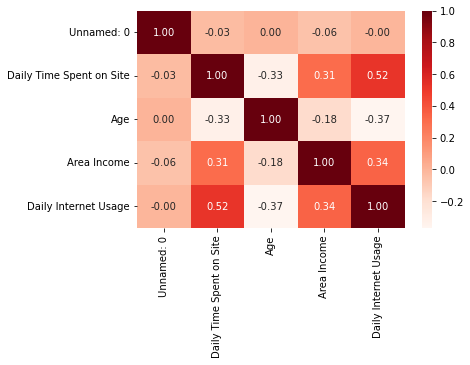

In [12]:
sns.heatmap(df.corr(),cmap='Reds',annot=True,fmt='.2f')

- kolom `Daily Internet Usage` dengan `Daily Time Spent on Site` memiliki korelasi positif cukup kuat
- kolom `Area Income` dengan `Daily Time Spent on Site` memiliki korelasi positif lemah
- kolom `Daily Internet Usage` dengan `Area Income` memiliki korelasi positif lemah

## Data Preprocessing

### Removing Duplicates & Imputation for Null Values

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

langkah yang akan dilakukan pada kolom berisi null :
1. Pada kolom `Daily Time Spent on Site`,`Area Income`, dan `Daily Internet Usage` akan dilakukan imputasi dengan `median`
2. Pada kolom `Male` akan dilakukan imputasi dengan `modus`

In [123]:
# Imputation for null values with Median and Modus

df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].median(), inplace=True)
df['Area Income'].fillna(df['Area Income'].median(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].median(), inplace=True)
df['Male'].fillna(df['Male'].mode()[0], inplace=True)

df.isna().sum()

Unnamed: 0                                0
Daily Time Spent on Site                  0
Age                                       0
Area Income                               0
Daily Internet Usage                      0
Male                                      0
Timestamp                                 0
Clicked on Ad                             0
city                                      0
province                                  0
category                                  0
city_Balikpapan                           0
city_Bandar Lampung                       0
city_Bandung                              0
city_Banjarmasin                          0
city_Batam                                0
city_Bekasi                               0
city_Bogor                                0
city_Cimahi                               0
city_Denpasar                             0
city_Depok                                0
city_Jakarta Barat                        0
city_Jakarta Pusat              

### Feature Encoding

Feature Encoding yang akan dilakukan :
1. Pada kolom `Male` dan `Clicked on Ad` akan dilakukan `Label Encoding`
2. Pada kolom `City`,`Province` dan `Category` akan dilakukan `One Hot Encoding`
3. Untuk kolom `Timestamp` akan dirubah menjadi tipe datetime dan akan diekstrak menjadi kolom `Year`,`Month`,`Day`, dan `Time`

In [27]:
df['Male'].value_counts()

0    521
1    479
Name: Male, dtype: int64

In [28]:
df['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

In [31]:
# label Encoding for `Male` and `Clicked on Ad` column

df['Male'] = df['Male'].replace(['Laki-Laki','Perempuan'],[1,0])
df['Clicked on Ad'] = df['Clicked on Ad'].replace(['Yes','No'],[1,0])

df['Male'].value_counts()

0    521
1    479
Name: Male, dtype: int64

In [32]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [18]:
# One Hot Encoding for `City`,`Province`, and `Category' columns

for i in ['city','province','category']:
    onehots = pd.get_dummies(df[i], prefix=i)
    df = df.join(onehots)

In [19]:
# Extracting `Timestamp` column to get `Year`,`Month`,`Day`, and `Time` columns

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = [d.date() for d in df['Timestamp']]
df['Time'] = [d.time() for d in df['Timestamp']]
df['Date'] = df['Date'].astype(str)
df2 = df['Date'].str.split('-', expand=True)
df2 = df2.rename(columns={0:'Year',1:'Month',2:'Day'})
df.join(df2)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,city_Balikpapan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,city_Jakarta Barat,city_Jakarta Pusat,city_Jakarta Selatan,city_Jakarta Timur,city_Jakarta Utara,city_Makassar,city_Malang,city_Medan,city_Padang,city_Pakanbaru,city_Palembang,city_Pontianak,city_Samarinda,city_Semarang,city_Serang,city_Surabaya,city_Surakarta,city_Tangerang,city_Tangerang Selatan,city_Tasikmalaya,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Date,Time,Year,Month,Day
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2016-03-27,00:53:00,2016,03,27
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,No,Denpasar,Bali,Food,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2016-04-04,01:39:00,2016,04,04
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2016-03-13,20:35:00,2016,03,13
3,3,74.15,29,383643260.0,245.89,1,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2016-01-10,02:31:00,2016,01,10
4,4,68.37,35,517229930.0,225.58,0,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2016-06-03,03:36:00,2016,06,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,1,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2016-02-11,21:49:00,2016,02,11
996,996,51.30,45,474475190.0,134.42,1,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2016-04-22,02:07:00,2016,04,22
997,997,68.11,51,296910040.0,120.37,1,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-02-01,17:24:00,2016,02,01
998,998,55.55,19,293445530.0,187.95,0,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2016-03-24,02:35:00,2016,03,24


## Data Modelling & Evaluation

### Split Data

In [34]:
# Split data into features(X) and target(y)
X = df[['Age','Area Income','Daily Time Spent on Site','Daily Internet Usage']].values
y = df['Clicked on Ad'].values

# Split data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [1]:
X

NameError: name 'X' is not defined

### Fit and Predict

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print('Test score:' + str(model.score(X_test, y_test))) #Test score
    print('Train score: ' + str(model.score(X_train, y_train))) #Train score


    conf_mat = confusion_matrix(y_test,y_pred)
    print(conf_mat)
    print('='*100)
    print()

In [143]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

eval_classification(model)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
Recall (Test Set): 0.94
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 1.00
Test score:0.9366666666666666
Train score: 1.0
[[136  10]
 [  9 145]]



### Tuning Hyperparameter

In [150]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [3] # Maximum number of levels in tree
min_samples_split = [int(i) for i in range(100)] # Minimum number of samples required to split a node
min_samples_leaf = [int(i) for i in range(50)] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
modelt = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='accuracy')
modelt.fit(X_train, y_train)

# Predict & Evaluation
y_pred = modelt.predict(X_test)#Check performa dari model
eval_classification(modelt)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.94
Precision (Test Set): 0.89
Precision (Train Set): 0.91
Recall (Test Set): 0.97
Recall (Train Set): 0.97
F1-Score (Test Set): 0.93
F1-Score (Train Set): 0.94
Test score:0.9266666666666666
Train score: 0.9414285714285714
[[128  18]
 [  4 150]]



In [151]:
print('Best max_depth:', modelt.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', modelt.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', modelt.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', modelt.best_estimator_.get_params()['max_features'])

Best max_depth: 3
Best min_samples_split: 60
Best min_samples_leaf: 8
Best max_features: auto


In [152]:
print('Train score: ' + str(modelt.score(X_train, y_train)))
print('Test score:' + str(modelt.score(X_test, y_test)))

Train score: 0.9414285714285714
Test score:0.9266666666666666


In [154]:
models = DecisionTreeClassifier(max_depth = 3, min_samples_split = 60, min_samples_leaf = 8, max_features = 'auto', random_state=42)
models.fit(X_train,y_train)

y_pred = models.predict(X_test)
eval_classification(models)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.94
Precision (Test Set): 0.89
Precision (Train Set): 0.91
Recall (Test Set): 0.97
Recall (Train Set): 0.97
F1-Score (Test Set): 0.93
F1-Score (Train Set): 0.94
Test score:0.9266666666666666
Train score: 0.9414285714285714
[[128  18]
 [  4 150]]



In [155]:
print('Train score: ' + str(models.score(X_train, y_train))) #accuracy
print('Test score:' + str(models.score(X_test, y_test))) #accuracy

Train score: 0.9414285714285714
Test score:0.9266666666666666


## 2nd Model & Fit (with Normalization)

### Standarization & Normalization

- Pada kolom `Age` dan `Area Income` akan dilakukan standarisasi karena distribusinya skewed
- Pada kolom `Daily Time Spent on Site` dan `Daily Internet Usage` akan dilakukan normalisasi

In [124]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mm = MinMaxScaler()
ss = StandardScaler()

In [126]:
# Standarization for `Age` and `Area Income`

df['Age std'] = ss.fit_transform(df['Age'].values.reshape(len(df),1))
df['Area Income std'] = ss.fit_transform(df['Area Income'].values.reshape(len(df),1))

In [127]:
# Normalization for `Daily Time Spent on Site` and `Daily Internet Usage`

df['Daily Time Spent on Site norm'] = mm.fit_transform(df['Daily Time Spent on Site'].values.reshape(len(df),1))
df['Daily Internet Usage norm'] = mm.fit_transform(df['Daily Internet Usage'].values.reshape(len(df),1))

### Split Data

In [128]:
X1 = df[['Age std','Area Income std','Daily Time Spent on Site norm','Daily Internet Usage norm']].values
y1 = df['Clicked on Ad'].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [130]:
model2 = DecisionTreeClassifier()

model2.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [159]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_classification2(model):
    y_pred = model.predict(X_test1)
    y_pred_train = model.predict(X_train1)
    y_pred_proba = model.predict_proba(X_test1)
    y_pred_proba_train = model.predict_proba(X_train1)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test1, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train1, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test1, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train1, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(y_test1, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train1, y_pred_train))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test1, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train1, y_pred_train))

    print('Test score:' + str(model.score(X_test1, y_test1))) #Test score
    print('Train score: ' + str(model.score(X_train1, y_train1))) #Train score


    conf_mat = confusion_matrix(y_test1,y_pred)
    print(conf_mat)
    print('='*100)
    print()

In [160]:
eval_classification2(model2)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
Recall (Test Set): 0.94
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 1.00
Test score:0.9366666666666666
Train score: 1.0
[[136  10]
 [  9 145]]



In [161]:
model2s = DecisionTreeClassifier(max_depth = 3, min_samples_split = 60, min_samples_leaf = 8, max_features = 'auto', random_state=42)
model2s.fit(X_train1,y_train1)

eval_classification2(model2s)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.94
Precision (Test Set): 0.89
Precision (Train Set): 0.91
Recall (Test Set): 0.97
Recall (Train Set): 0.97
F1-Score (Test Set): 0.93
F1-Score (Train Set): 0.94
Test score:0.9266666666666666
Train score: 0.9414285714285714
[[128  18]
 [  4 150]]



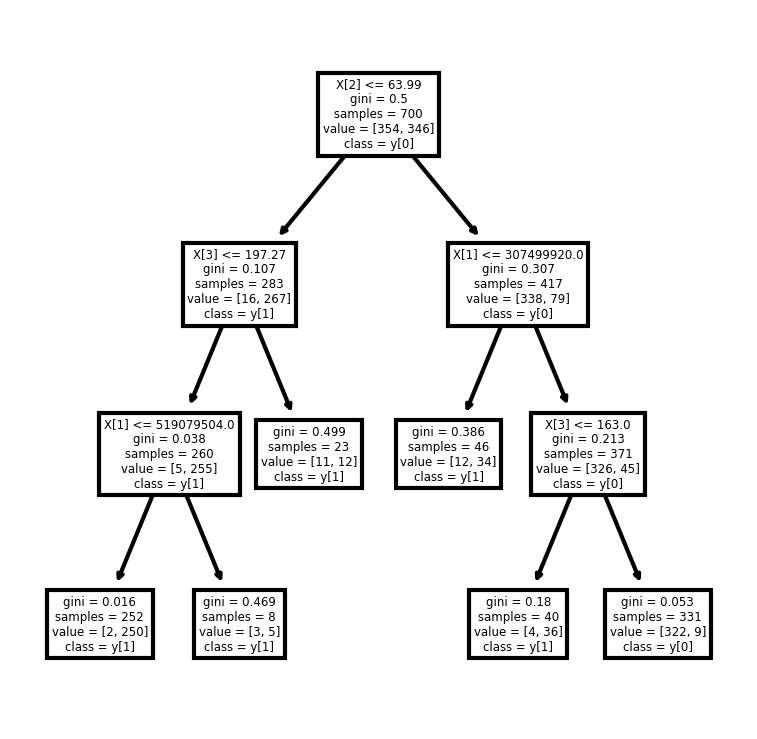

In [192]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)

tree.plot_tree(models, class_names=True)
plt.savefig('Tree1.png', dpi=300);

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.11562
Feature: 2, Score: 0.66490
Feature: 3, Score: 0.21948


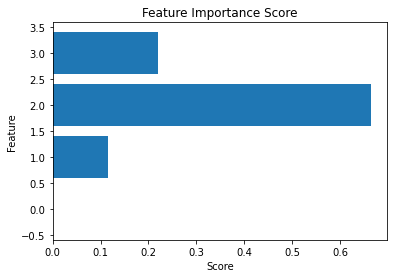

In [184]:
importance = model2s.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')
plt.show()

In [193]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

In [194]:
show_feature_importance(model2s)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'